# RAG 구조

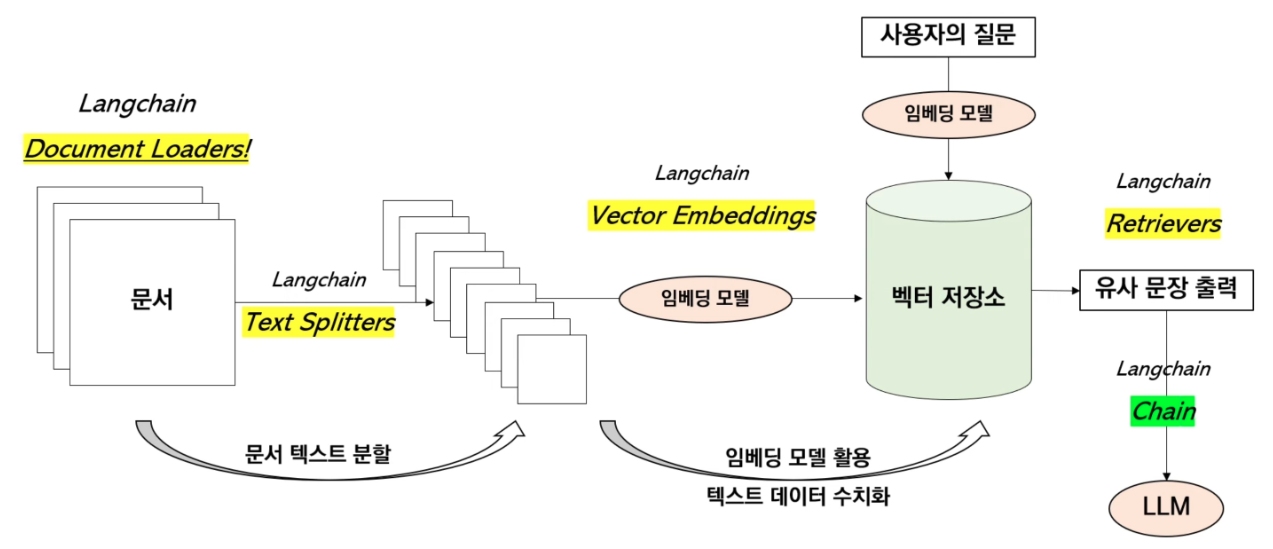

## [Document Loader](https://python.langchain.com/docs/integrations/document_loaders/)

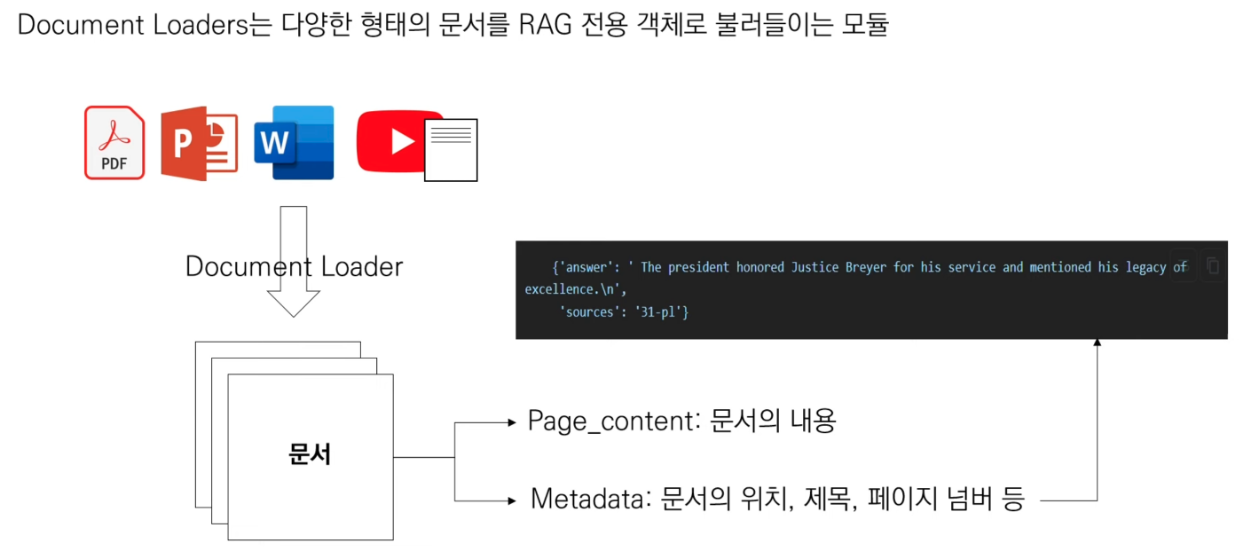

LangChain에서 Document Loader는 다양한 소스에서 문서를 불러오고 처리하는 과정을 담당합니다. 특히 사전지식이 필요한 지식 기반의 태스크, 정보 검색, 데이터 처리 작업 등을 처리할 때 반드시 필요합니다. Document Loader의 주요 목적은 효율적으로 문서 데이터를 수집하고, 사용 가능한 형식으로 변환하는 것입니다.
1. `다양한 소스 지원`: 웹 페이지, PDF 파일, 데이터베이스 등 다양한 소스에서 문서를 불러올 수 있습니다.
2. `데이터 변환 및 정제`: 불러온 문서 데이터를 분석하고 처리하여, 랭체인의 다른 모듈이나 알고리즘이 처리하기 쉬운 형태로 변환합니다. 불필요한 데이터를 제거하거나, 구조를 변경할 수도 있습니다.
3. `효율적인 데이터 관리`: 대량의 문서 데이터를 효율적으로 관리하고, 필요할 때 쉽게 접근할 수 있도록 합니다. 이를 통해 검색 속도를 향상시키고, 전체 시스템의 성능을 높일 수 있습니다.

사용 예시:
- 웹 크롤링을 통해 특정 주제에 관한 기사나 논문을 자동으로 수집하고, 이를 분석하여 요약 정보를 생성하는 애플리케이션.
- 기업 내부 문서 저장소에서 필요한 문서를 빠르게 검색하고, 관련 정보를 추출하여 보고서를 자동으로 작성하는 시스템.

# Setup

## install

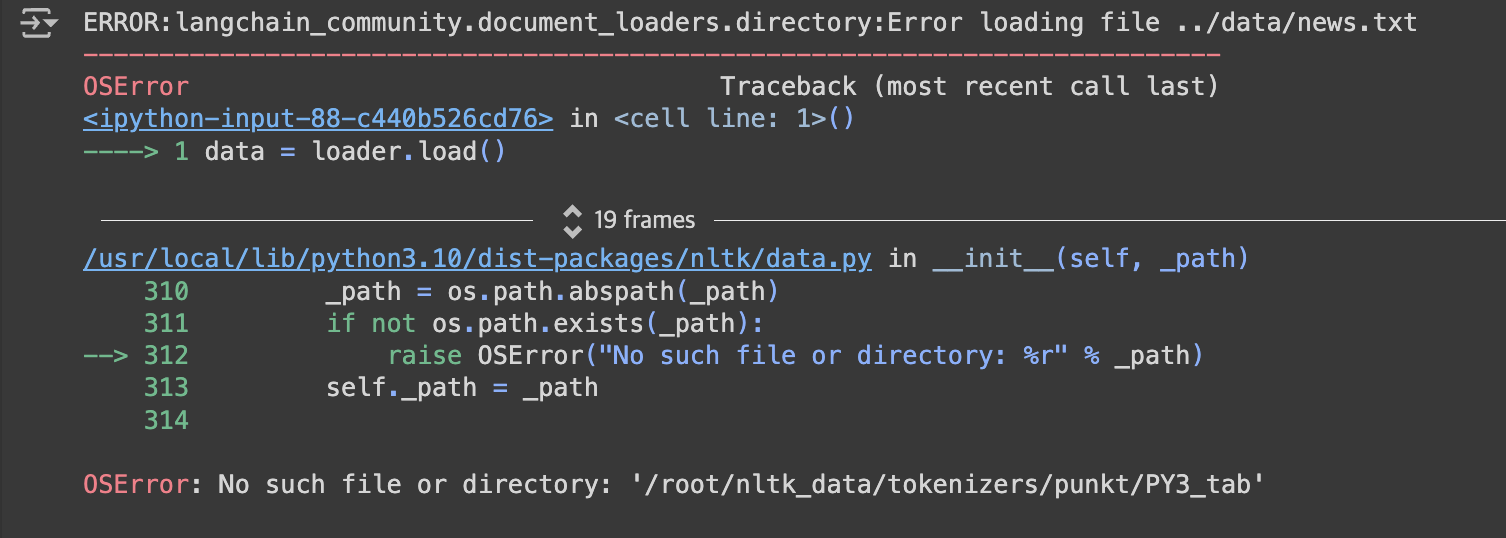

In [ ]:
# 위에 오류 처리를 위해서 업그레이드 실행
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
!pip install -qU langchain_community beautifulsoup4 unstructured jq pypdf PyPDF2 pdfplumber pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


# [LangChain Document](https://python.langchain.com/docs/versions/migrating_chains/map_reduce_chain/)
- Document 객체에는 `page_content` 필드와 `metadata` 필드가 들어 있습니다.

In [ ]:
from langchain_core.documents import Document

docs = [
    Document(page_content="Apples are red", metadata={"title": "apple_book"}),
    Document(page_content="Blueberries are blue", metadata={"title": "blueberry_book"}),
    Document(page_content="Bananas are yelow", metadata={"title": "banana_book"}),
]

In [ ]:
len(docs)

3

## metadata

In [ ]:
docs[0].metadata

{'title': 'apple_book'}

## page_content

In [ ]:
docs[0].page_content

'Apples are red'

# [웹 문서 (WebBaseLoader)](https://python.langchain.com/docs/integrations/document_loaders/web_base/)
- `WebBaseLoader`는 특정 웹 페이지의 내용을 로드하고 파싱하기 위해 설계된 클래스입니다.

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

## 싱글 웹문서

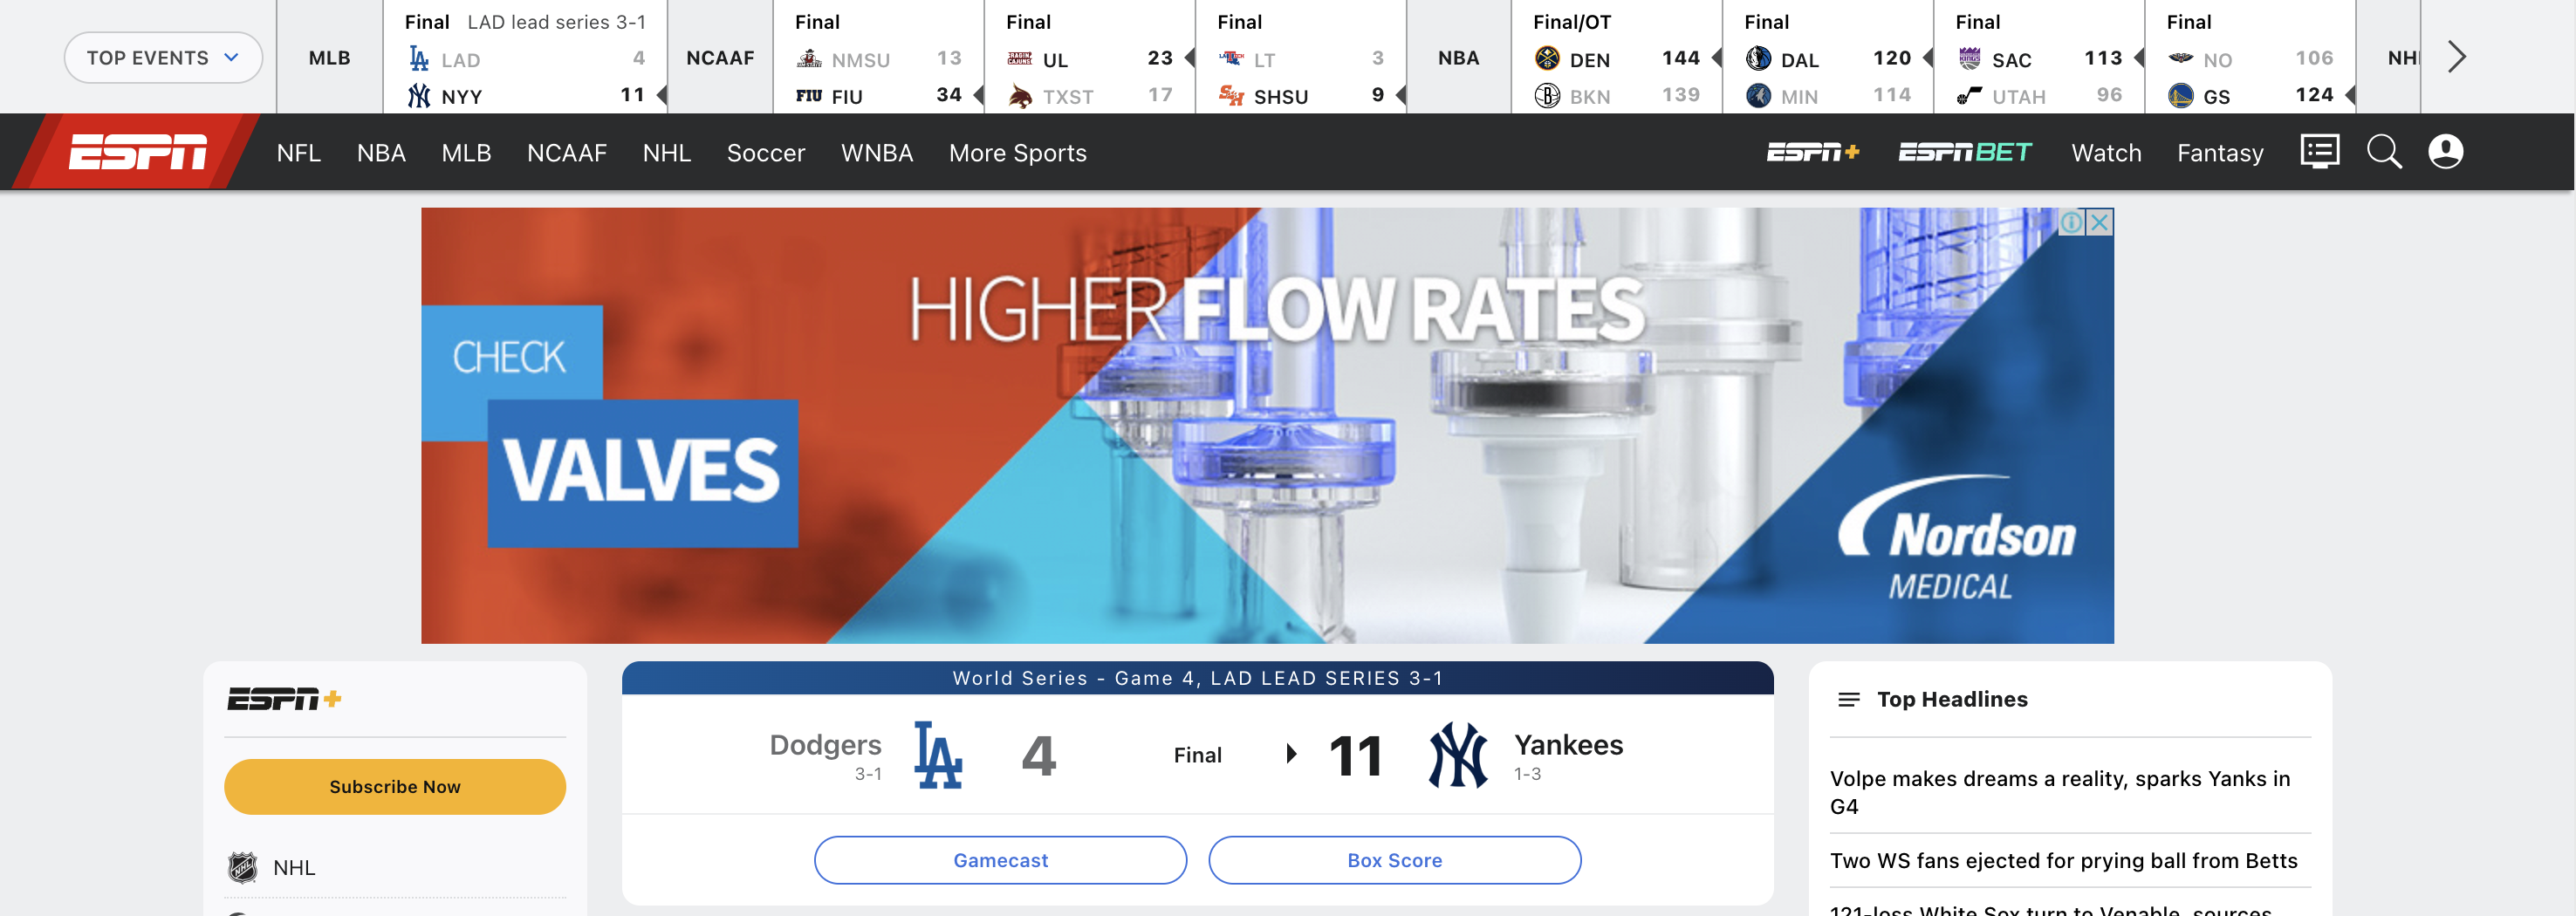

- loader 생성

In [ ]:
loader = WebBaseLoader(web_path="https://www.espn.com/")

- 문서 로드

In [ ]:
docs = loader.load()

- 로드된 문서의 수

In [ ]:
len(docs)

1

- 해당 웹 문서의 메타 정보

In [ ]:
docs[0].metadata

{'source': 'https://www.espn.com/',
 'title': 'ESPN - Serving Sports Fans. Anytime. Anywhere.',
 'description': 'Visit ESPN for live scores, highlights and sports news. Stream exclusive games on ESPN+ and play fantasy sports.',
 'language': 'en'}

- 해당 웹 문서의 컨텐츠 정보

In [ ]:
docs[0].page_content

"\n\n\n\n\n\n\n\n\nESPN - Serving Sports Fans. Anytime. Anywhere.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        Skip to main content\n    \n\n        Skip to navigation\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<\n\n>\n\n\n\n\n\n\n\n\n\nMenuESPN\n\n\n\n\n\nscores\n\n\n\n\nNEW! Find where to watch all of your favorite sports!\n\n\n\n\n\n\n\nNFLNBAMLBNCAAFNHLSoccerWNBAMore SportsBoxingCFLNCAACricketF1GolfHorseLLWSMMANASCARNBA G LeagueNBA Summer LeagueNCAAMNCAAWNWSLOlympicsPLLProfessional WrestlingRacingRN BBRN FBRugbySports BettingTennisX GamesUFLFantasyWatchESPN BETESPN+\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\nSubscribe Now\n\n\n\n\n\nNHL\n\n\n\n\n\n\n\nNCAA Women's Volleyball\n\n\n\n\n\n\n\nNFL PrimeTime\n\n\nQuick Links\n\n\n\n\nWhere To Watch\n\n\n\n\n\n\n\nWorld Series\n\n\n\n\n\n\n\n2024 NFL Schedule\n\n\n\n\n

## 다중 웹문서

In [ ]:
loader_multiple_pages = WebBaseLoader(web_paths=["https://www.espn.com/", "https://google.com"])

In [ ]:
docs = loader_multiple_pages.load()

In [ ]:
len(docs)

2

In [ ]:
docs[0].metadata

{'source': 'https://www.espn.com/',
 'title': 'ESPN - Serving Sports Fans. Anytime. Anywhere.',
 'description': 'Visit ESPN for live scores, highlights and sports news. Stream exclusive games on ESPN+ and play fantasy sports.',
 'language': 'en'}

In [ ]:
docs[1].metadata

{'source': 'https://google.com',
 'title': 'Google',
 'description': "Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for.",
 'language': 'en'}

## lazy_load()
- lazy_load()을 사용하면 한 번에 한 페이지만 로드하여 메모리 요구 사항을 최소화할 수 있습니다.

In [ ]:
pages = []
for doc in loader_multiple_pages.lazy_load():
    pages.append(doc)

print(pages[0].metadata)
print(pages[1].metadata)

{'source': 'https://www.espn.com/', 'title': 'ESPN - Serving Sports Fans. Anytime. Anywhere.', 'description': 'Visit ESPN for live scores, highlights and sports news. Stream exclusive games on ESPN+ and play fantasy sports.', 'language': 'en'}
{'source': 'https://google.com', 'title': 'Google', 'description': "Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for.", 'language': 'en'}


## [bs4.SoupStrainer](https://www.tutorialspoint.com/beautiful_soup/beautiful_soup_parsing_only_section_of_a_document.htm)
- `bs_kwargs` 매개변수는 BeautifulSoup을 사용하여 HTML을 파싱할 때 사용되는 인자들을 딕셔너리 형태로 제공합니다.
- 예제에서는 `bs4.SoupStrainer`를 사용하여 특정 클래스 이름을 가진 HTML 요소만 파싱하도록 지정하고 있습니다.

In [ ]:
import bs4

In [ ]:
loader = WebBaseLoader(
    web_paths=[
        "https://n.news.naver.com/article/437/0000378416",
        "https://n.news.naver.com/mnews/hotissue/article/092/0002340014?type=series&cid=2000063",
    ],
    bs_kwargs={
        "parse_only" : bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    },
    header_template={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36",
    },
)

In [ ]:
docs = loader.load()
len(docs)

2

In [ ]:
docs[0]

Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="\n출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책\n\n\n[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.2021년 이후 태어난 직원 자녀에 1억원씩, 총 70억원을 지원하고 앞으로도 이 정책을 이어가기로 했습니다.해당 기간에 연년생과 쌍둥이 자녀가 있으면 총 2억원을 받게 됩니다.[오현석/부영그룹 직원 : 아이 키우는 데 금전적으로 많이 힘든 세상이잖아요. 교육이나 생활하는 데 큰 도움이 될 거라 생각합니다.]만약 셋째까지 낳는 경우엔 국민주택을 제공하겠다는 뜻도 밝혔습니다.[이중근/부영그룹 회장 : 3년 이내에 세 아이를 갖는 분이 나올 것이고 따라서 주택을 제공할 수 있는 계기가 될 것으로 생각하고.][조용현/부영그룹 직원 : 와이프가 셋째도 갖고 싶어 했는데 경제적 부담 때문에 부정적이었거든요. (이제) 긍정적으로 생각할 수 있을 것 같습니다.]오늘 행사에서는, 회사가 제공하는 출산장려금은 받는 직

## SSL 인증 오류를 우회

In [ ]:
# loader 생성
loader = WebBaseLoader("https://www.espn.com/")

In [ ]:
# ssl 인증 우회
loader.requests_kwargs = {"verify": False}

In [ ]:
# 데이터 로드
docs = loader.load()

len(docs)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.espn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


1

## xml 웹 문서

In [ ]:
# loader 생성
loader = WebBaseLoader(
    "https://www.govinfo.gov/content/pkg/CFR-2018-title10-vol3/xml/CFR-2018-title10-vol3-sec431-86.xml"
)

In [ ]:
# xml 문서로 설정
loader.default_parser = "xml"

In [ ]:
# 데이터 로드
docs = loader.load()

len(docs)

1

# [텍스트 문서 (TextLoader)](https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/)
- `TextLoader`를 사용하여 텍스트 파일을 불러올 수 있습니다. 그리고 텍스트 파일의 내용을 랭체인의 Document 객체로 변환하고 이를 리스트 형태로 반환합니다.

In [ ]:
from langchain_community.document_loaders import TextLoader

In [ ]:
loader = TextLoader('history.txt')


In [ ]:
data = loader.load()

len(data)

1

In [ ]:
data[0].page_content

'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년, 한국은 일본에 의해 강제로 병합되어 35년간의 식민 지배를 받게 됩니다. 이 기간 동안 한국인들은 독립을 위한 다양한 운동을 전개했으며, 이는 1945년 일본의 패망으로 이어지는 독립으로 결실을 맺었습니다.\n\n해

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt'}

# [CSV 문서](https://python.langchain.com/docs/integrations/document_loaders/csv/)

## [CSVLoader](https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.csv_loader.CSVLoader.html)
- `CSVLoader` 클래스를 사용하여 CSV 파일에서 데이터를 로드합니다.
- CSV 파일의 각 행을 추출하여 서로 다른 Document 객체로 변환합니다. 이들 문서 객체로 이루어진 리스트 형태로 반환합니다.

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949')
data = loader.load()

In [ ]:
len(data)

143

- 다음 출력 결과를 보면 리스트 배열 안에 Document 객체가 담겨 있는 것을 볼 수 있습니다. Document 객체의 `metadata` 속성을 통해 `원본 파일의 출처('source')`와 `행 번호('row')`를 확인할 수 있습니다.

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/한국주택금융공사_주택금융관련_지수_20160101.csv',
 'row': 0}

In [ ]:
data[0].page_content

'연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득: 2.06\n제주평균 대출금액  평균 연소득: 1.28'

### 데이터 출처 정보를 특정 필드(열, column)로 지정
- `CSVLoader`를 사용하여 CSV 파일을 로드할 때, `source_column 속성`에 데이터의 `출처 정보('source')`로 사용될 열의 이름을 지정할 수 있습니다.

다음 예제에서는 '연도' 열이 각 행 데이터의 출처 정보로 사용됩니다. `'source' 속성`을 확인해 보면 '2004-01-01' 와 같이 해당 행의 '연도' 열에 있는 값이 적용된 것을 알 수 있습니다.

In [ ]:
loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   source_column='연도')
data = loader.load()

In [ ]:
len(data)

143

In [ ]:
data[0].metadata

{'source': '2004-01-01', 'row': 0}

In [ ]:
data[0].page_content

'연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득: 2.06\n제주평균 대출금액  평균 연소득: 1.28'

### CSV 파싱 옵션을 지정
- `CSVLoader` 클래스를 사용할 때 추가적인 CSV 관련 설정을 csv_args 매개변수를 통해 지정할 수 있습니다.
- `csv_args`는 파이썬 표준 라이브러리인 csv 모듈에 전달될 추가 인자들을 담는 딕셔너리입니다.

다음 예제는 CSV 파일의 구분자('delimiter')로 줄바꿈 문자('\n')를 지정하고 있습니다. 줄바꿈 문자를 기준으로 각 필드를 구분하기 때문에, 기본 값인 콤마(',')를 적용했을 경우와 파싱된 결과에 차이가 있습니다.

In [ ]:
loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   csv_args={
                       'delimiter': '\n',
                   })
data = loader.load()

In [ ]:
len(data)

143

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/한국주택금융공사_주택금융관련_지수_20160101.csv',
 'row': 0}

In [ ]:
data[0].page_content

'연도,전국소득대비 주택가격 비율,서울소득대비 주택가격 비율,부산소득대비 주택가격 비율,대구소득대비 주택가격 비율,인천소득대비 주택가격 비율,광주소득대비 주택가격 비율,대전소득대비 주택가격 비율,울산소득대비 주택가격 비율,세종소득대비 주택가격 비율,경기소득대비 주택가격 비율,강원소득대비 주택가격 비율,충북소득대비 주택가격 비율,충남소득대비 주택가격 비율,전북소득대비 주택가격 비율,전남소득대비 주택가격 비율,경북소득대비 주택가격 비율,경남소득대비 주택가격 비율,제주소득대비 주택가격 비율,전국평균 대출금액  평균 연소득,서울평균 대출금액  평균 연소득,부산평균 대출금액  평균 연소득,대구평균 대출금액  평균 연소득,인천평균 대출금액  평균 연소득,광주평균 대출금액  평균 연소득,대전평균 대출금액  평균 연소득,울산평균 대출금액  평균 연소득,세종평균 대출금액  평균 연소득,경기평균 대출금액  평균 연소득,강원평균 대출금액  평균 연소득,충북평균 대출금액  평균 연소득,충남평균 대출금액  평균 연소득,전북평균 대출금액  평균 연소득,전남평균 대출금액  평균 연소득,경북평균 대출금액  평균 연소득,경남평균 대출금액  평균 연소득,제주평균 대출금액  평균 연소득: 2004-01-01,4.21,4.89,3.95,3.73,4.65,2.81,4.68,2.66,0,4.17,2.49,2.62,2.17,3.12,2.12,2.12,3.81,2.99,2.36,2.61,2.35,2.24,2.7,1.6,2.26,1.67,0,2.42,1.44,1.53,1.21,1.9,1.42,1.31,2.06,1.28'

## [UnstructuredCSVLoader](https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.csv_loader.UnstructuredCSVLoader.html)

In [ ]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

loader = UnstructuredCSVLoader(
    file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949', mode="elements"
)
docs = loader.load()


In [ ]:
docs[0].metadata["text_as_html"]


'<table><tr><td>연도</td><td>전국소득대비 주택가격 비율</td><td>서울소득대비 주택가격 비율</td><td>부산소득대비 주택가격 비율</td><td>대구소득대비 주택가격 비율</td><td>인천소득대비 주택가격 비율</td><td>광주소득대비 주택가격 비율</td><td>대전소득대비 주택가격 비율</td><td>울산소득대비 주택가격 비율</td><td>세종소득대비 주택가격 비율</td><td>경기소득대비 주택가격 비율</td><td>강원소득대비 주택가격 비율</td><td>충북소득대비 주택가격 비율</td><td>충남소득대비 주택가격 비율</td><td>전북소득대비 주택가격 비율</td><td>전남소득대비 주택가격 비율</td><td>경북소득대비 주택가격 비율</td><td>경남소득대비 주택가격 비율</td><td>제주소득대비 주택가격 비율</td><td>전국평균 대출금액 평균 연소득</td><td>서울평균 대출금액 평균 연소득</td><td>부산평균 대출금액 평균 연소득</td><td>대구평균 대출금액 평균 연소득</td><td>인천평균 대출금액 평균 연소득</td><td>광주평균 대출금액 평균 연소득</td><td>대전평균 대출금액 평균 연소득</td><td>울산평균 대출금액 평균 연소득</td><td>세종평균 대출금액 평균 연소득</td><td>경기평균 대출금액 평균 연소득</td><td>강원평균 대출금액 평균 연소득</td><td>충북평균 대출금액 평균 연소득</td><td>충남평균 대출금액 평균 연소득</td><td>전북평균 대출금액 평균 연소득</td><td>전남평균 대출금액 평균 연소득</td><td>경북평균 대출금액 평균 연소득</td><td>경남평균 대출금액 평균 연소득</td><td>제주평균 대출금액 평균 연소득</td></tr><tr><td>2004-01-01</td><td>4.21</td><td>4.89</td><td>3.95</td><td>3.73</td><td>4.65</td><td>2.81</td><td>4.6

In [ ]:
docs[0].page_content


'연도 전국소득대비 주택가격 비율 서울소득대비 주택가격 비율 부산소득대비 주택가격 비율 대구소득대비 주택가격 비율 인천소득대비 주택가격 비율 광주소득대비 주택가격 비율 대전소득대비 주택가격 비율 울산소득대비 주택가격 비율 세종소득대비 주택가격 비율 경기소득대비 주택가격 비율 강원소득대비 주택가격 비율 충북소득대비 주택가격 비율 충남소득대비 주택가격 비율 전북소득대비 주택가격 비율 전남소득대비 주택가격 비율 경북소득대비 주택가격 비율 경남소득대비 주택가격 비율 제주소득대비 주택가격 비율 전국평균 대출금액 평균 연소득 서울평균 대출금액 평균 연소득 부산평균 대출금액 평균 연소득 대구평균 대출금액 평균 연소득 인천평균 대출금액 평균 연소득 광주평균 대출금액 평균 연소득 대전평균 대출금액 평균 연소득 울산평균 대출금액 평균 연소득 세종평균 대출금액 평균 연소득 경기평균 대출금액 평균 연소득 강원평균 대출금액 평균 연소득 충북평균 대출금액 평균 연소득 충남평균 대출금액 평균 연소득 전북평균 대출금액 평균 연소득 전남평균 대출금액 평균 연소득 경북평균 대출금액 평균 연소득 경남평균 대출금액 평균 연소득 제주평균 대출금액 평균 연소득 2004-01-01 4.21 4.89 3.95 3.73 4.65 2.81 4.68 2.66 0 4.17 2.49 2.62 2.17 3.12 2.12 2.12 3.81 2.99 2.36 2.61 2.35 2.24 2.7 1.6 2.26 1.67 0 2.42 1.44 1.53 1.21 1.9 1.42 1.31 2.06 1.28 2004-01-01 4.39 5.59 3.91 3.88 4.59 2.92 3.83 2.74 0 5.08 2.1 2.97 3.38 2.68 2.31 2.3 3.49 4.72 2.39 2.81 2.2 2.13 2.62 1.68 2.15 1.59 0 2.79 1.18 1.71 1.97 1.57 1.33 1.26 1.92 2.46 2004-01-01 4.19 5.14 4.9 3.83 4.78 3.41 4.19 2.93 0 4.11

# [Json 문서](https://python.langchain.com/docs/how_to/document_loader_json/)

## json

In [ ]:
import json
from pathlib import Path
from pprint import pprint


file_path=DATA_PATH+'people.json'
data = json.loads(Path(file_path).read_text())

In [ ]:
pprint(data)

[{'address': {'city': '서울', 'street': '312번지', 'zipCode': '83795'},
  'age': 31,
  'carOwnership': True,
  'hobbies': ['요리', '음악 감상', '사진 촬영'],
  'isMarried': True,
  'name': '박시우',
  'phoneNumbers': ['483-4639-1933', '947-4179-7976']},
 {'address': {'city': '서울', 'street': '877번지', 'zipCode': '36780'},
  'age': 31,
  'carOwnership': True,
  'hobbies': ['여행', '음악 감상', '등산'],
  'isMarried': False,
  'name': '정수아',
  'phoneNumbers': ['337-5721-3227', '387-3768-9586']},
 {'address': {'city': '서울', 'street': '175번지', 'zipCode': '89067'},
  'age': 43,
  'carOwnership': True,
  'hobbies': ['등산', '독서', '게임'],
  'isMarried': False,
  'name': '최도윤',
  'phoneNumbers': ['354-5563-4638', '471-9212-1826']},
 {'address': {'city': '서울', 'street': '690번지', 'zipCode': '70635'},
  'age': 22,
  'carOwnership': False,
  'hobbies': ['여행', '등산', '게임'],
  'isMarried': False,
  'name': '정민준',
  'phoneNumbers': ['468-2796-2152', '922-5760-7030']},
 {'address': {'city': '서울', 'street': '151번지', 'zipCode': '7911

## JSONLoader

- facebook_chat.json
```json
     'is_still_participant': True,
     'joinable_mode': {'link': '', 'mode': 1},
     'messages': [{'content': 'Bye!',
                   'sender_name': 'User 2',
                   'timestamp_ms': 1675597571851},
                  {'content': 'Oh no worries! Bye',
                   'sender_name': 'User 1',
                   'timestamp_ms': 1675597435669}
    ...
```

- JSONLoader
```python
loader = JSONLoader(
    # JSON 파일 위치에 맞게 수정해야 함.
    file_path='./example_data/facebook_chat.json',
    # JSON 구조에 따라 수정해야 함.
    jq_schema='.messages[].content',
    text_content=False)
```

In [ ]:
from langchain_community.document_loaders import JSONLoader

loader = JSONLoader(
    file_path=DATA_PATH+'people.json',
    jq_schema='.[]',
    text_content=False)

data = loader.load()

In [ ]:
len(data)

20

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/people.json',
 'seq_num': 1}

In [ ]:
data[0].page_content

'{"name": "\\ubc15\\uc2dc\\uc6b0", "age": 31, "isMarried": true, "carOwnership": true, "address": {"street": "312\\ubc88\\uc9c0", "city": "\\uc11c\\uc6b8", "zipCode": "83795"}, "phoneNumbers": ["483-4639-1933", "947-4179-7976"], "hobbies": ["\\uc694\\ub9ac", "\\uc74c\\uc545 \\uac10\\uc0c1", "\\uc0ac\\uc9c4 \\ucd2c\\uc601"]}'

## [extracting-metadata](https://python.langchain.com/docs/how_to/document_loader_json/#extracting-metadata)

In [ ]:
# Define the metadata extraction function.
def metadata_func(record: dict, metadata: dict) -> dict:

    metadata["address"] = record.get("address")
    metadata["hobbies"] = record.get("hobbies")

    return metadata

In [ ]:
loader = JSONLoader(
    file_path=DATA_PATH+'people.json',
    jq_schema='.[]',
    content_key="name",
    metadata_func=metadata_func
)

data = loader.load()

In [ ]:
len(data)

20

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/people.json',
 'seq_num': 1,
 'address': {'street': '312번지', 'city': '서울', 'zipCode': '83795'},
 'hobbies': ['요리', '음악 감상', '사진 촬영']}

In [ ]:
data[0].page_content

'박시우'

# [PDF 문서](https://medium.com/@prathameshamrutkar3/extracting-text-from-pdfs-in-python-pypdf2-pdfminer-six-pdfplumber-and-pymupdf-db95dbe6295a)

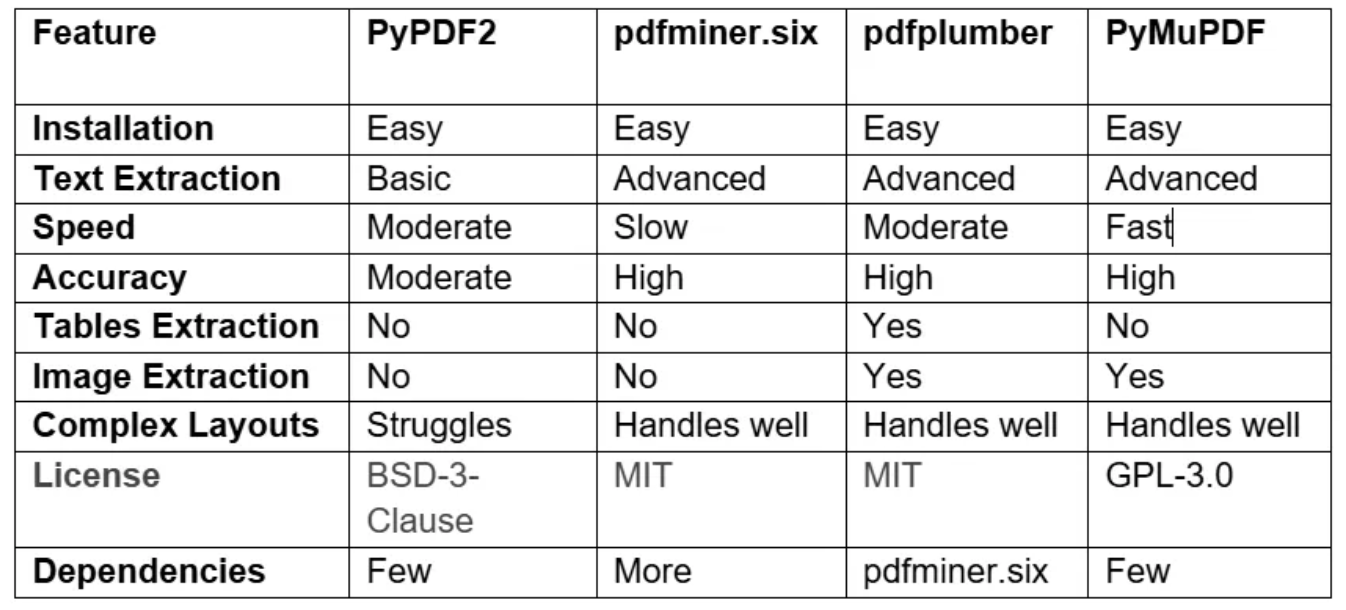

In [ ]:
pdf_path = DATA_PATH+'SPRI_AI_Brief_2023년12월호_F.pdf'

## PyPDF

### [PyPDFLoader](https://python.langchain.com/docs/integrations/document_loaders/pypdfloader/)

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(
    pdf_path
)

In [ ]:
docs = loader.load()
len(docs)

23

In [ ]:
docs[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 0}, page_content='2023년 12월호')

In [ ]:
docs[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'page': 0}

In [ ]:
docs[0].page_content

'2023년 12월호'

### [PyPDF2](https://pypdf2.readthedocs.io/en/3.x/)

In [ ]:
import PyPDF2

- Reading PDF Files

In [ ]:
# Open the PDF file in read binary mode
with open(pdf_path, 'rb') as file:
    # Create a PdfFileReader object
    pdf_reader = PyPDF2.PdfReader(file)
    # Display the number of pages in the PDF file
    print(f"Number of pages: {len(pdf_reader.pages)}")

Number of pages: 23


- Extracting PDF Metadata

In [ ]:
with open(pdf_path, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    # Extract and display metadata
    print(f"Author: {pdf_reader.metadata.author}")
    print(f"Title: {pdf_reader.metadata.title}")
    print(f"Producer: {pdf_reader.metadata.producer}")
    print(f"Creation Date: {pdf_reader.metadata.creation_date}")

Author: dj
Title: None
Producer: Hancom PDF 1.3.0.542
Creation Date: 2023-12-08 13:28:38+09:00


- Extracting Text from PDF Files

In [ ]:
results = []

with open(pdf_path, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    # Extract and display the text of each page
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text = page.extract_text()
        results.append(
            f"Page {page_num + 1}: {text}\n"
        )

In [ ]:
for result in results[:3]:
    print(result)

Page 1: 2023 년 12월호

Page 2: 2023 년 12월호
Ⅰ. 인공지능 산업 동향 브리프
 1. 정책/법제 
   ▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표  ························· 1
   ▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의··························· 2
   ▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언··························· 3
   ▹ 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각····································· 4
   ▹ 미국 연방거래위원회 , 저작권청에 소비자 보호와 경쟁 측면의 AI 의견서 제출················· 5
   ▹ EU AI 법 3자 협상, 기반모델 규제 관련 견해차로 난항··················································· 6
 
 2. 기업/산업 
   ▹ 미국 프런티어 모델 포럼, 1,000 만 달러 규모의 AI 안전 기금 조성································ 7
   ▹ 코히어 , 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개  ······································· 8
   ▹ 알리바바 클라우드 , 최신 LLM ‘통이치엔원 2.0’ 공개 ······················································ 9
   ▹ 삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개 ··························································· 10
   ▹ 구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 ················································ 11


## PDFPlumber

### [PDFPlumberLoader](https://python.langchain.com/docs/integrations/document_loaders/pdfplumber/)

In [ ]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader(pdf_path)

In [ ]:
docs = loader.load()
len(docs)

23

In [ ]:
docs[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'page': 0,
 'total_pages': 23,
 'Author': 'dj',
 'Creator': 'Hwp 2018 10.0.0.13462',
 'Producer': 'Hancom PDF 1.3.0.542',
 'CreationDate': "D:20231208132838+09'00'",
 'ModDate': "D:20231208132838+09'00'",
 'PDFVersion': '1.4'}

In [ ]:
docs[0].page_content

'12\n2023년 월호\n'

### [pdfplumber](https://github.com/jsvine/pdfplumber)

In [ ]:
import pdfplumber

- metadata

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    metadata = pdf.metadata
    print(metadata)

{'Author': 'dj', 'Creator': 'Hwp 2018 10.0.0.13462', 'Producer': 'Hancom PDF 1.3.0.542', 'CreationDate': "D:20231208132838+09'00'", 'ModDate': "D:20231208132838+09'00'", 'PDFVersion': '1.4'}


In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    print(len(pdf.pages))

23


- Extract Text

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    text = pdf.pages[1].extract_text()
    print(text)

2023년 12월호
Ⅰ
. 인공지능 산업 동향 브리프
1. 정책/법제
▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 ·························1
▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의···························2
▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언···························3
▹ 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각·····································4
▹ 미국 연방거래위원회, 저작권청에 소비자 보호와 경쟁 측면의 AI 의견서 제출·················5
▹ EU AI 법 3자 협상, 기반모델 규제 관련 견해차로 난항···················································6
2. 기업/산업
▹ 미국 프런티어 모델 포럼, 1,000만 달러 규모의 AI 안전 기금 조성································7
▹ 코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개 ·······································8
▹ 알리바바 클라우드, 최신 LLM ‘통이치엔원 2.0’ 공개 ······················································9
▹ 삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개 ···························································10
▹ 구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 ················································11
▹ IDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망···········································12
▹

- Extract image

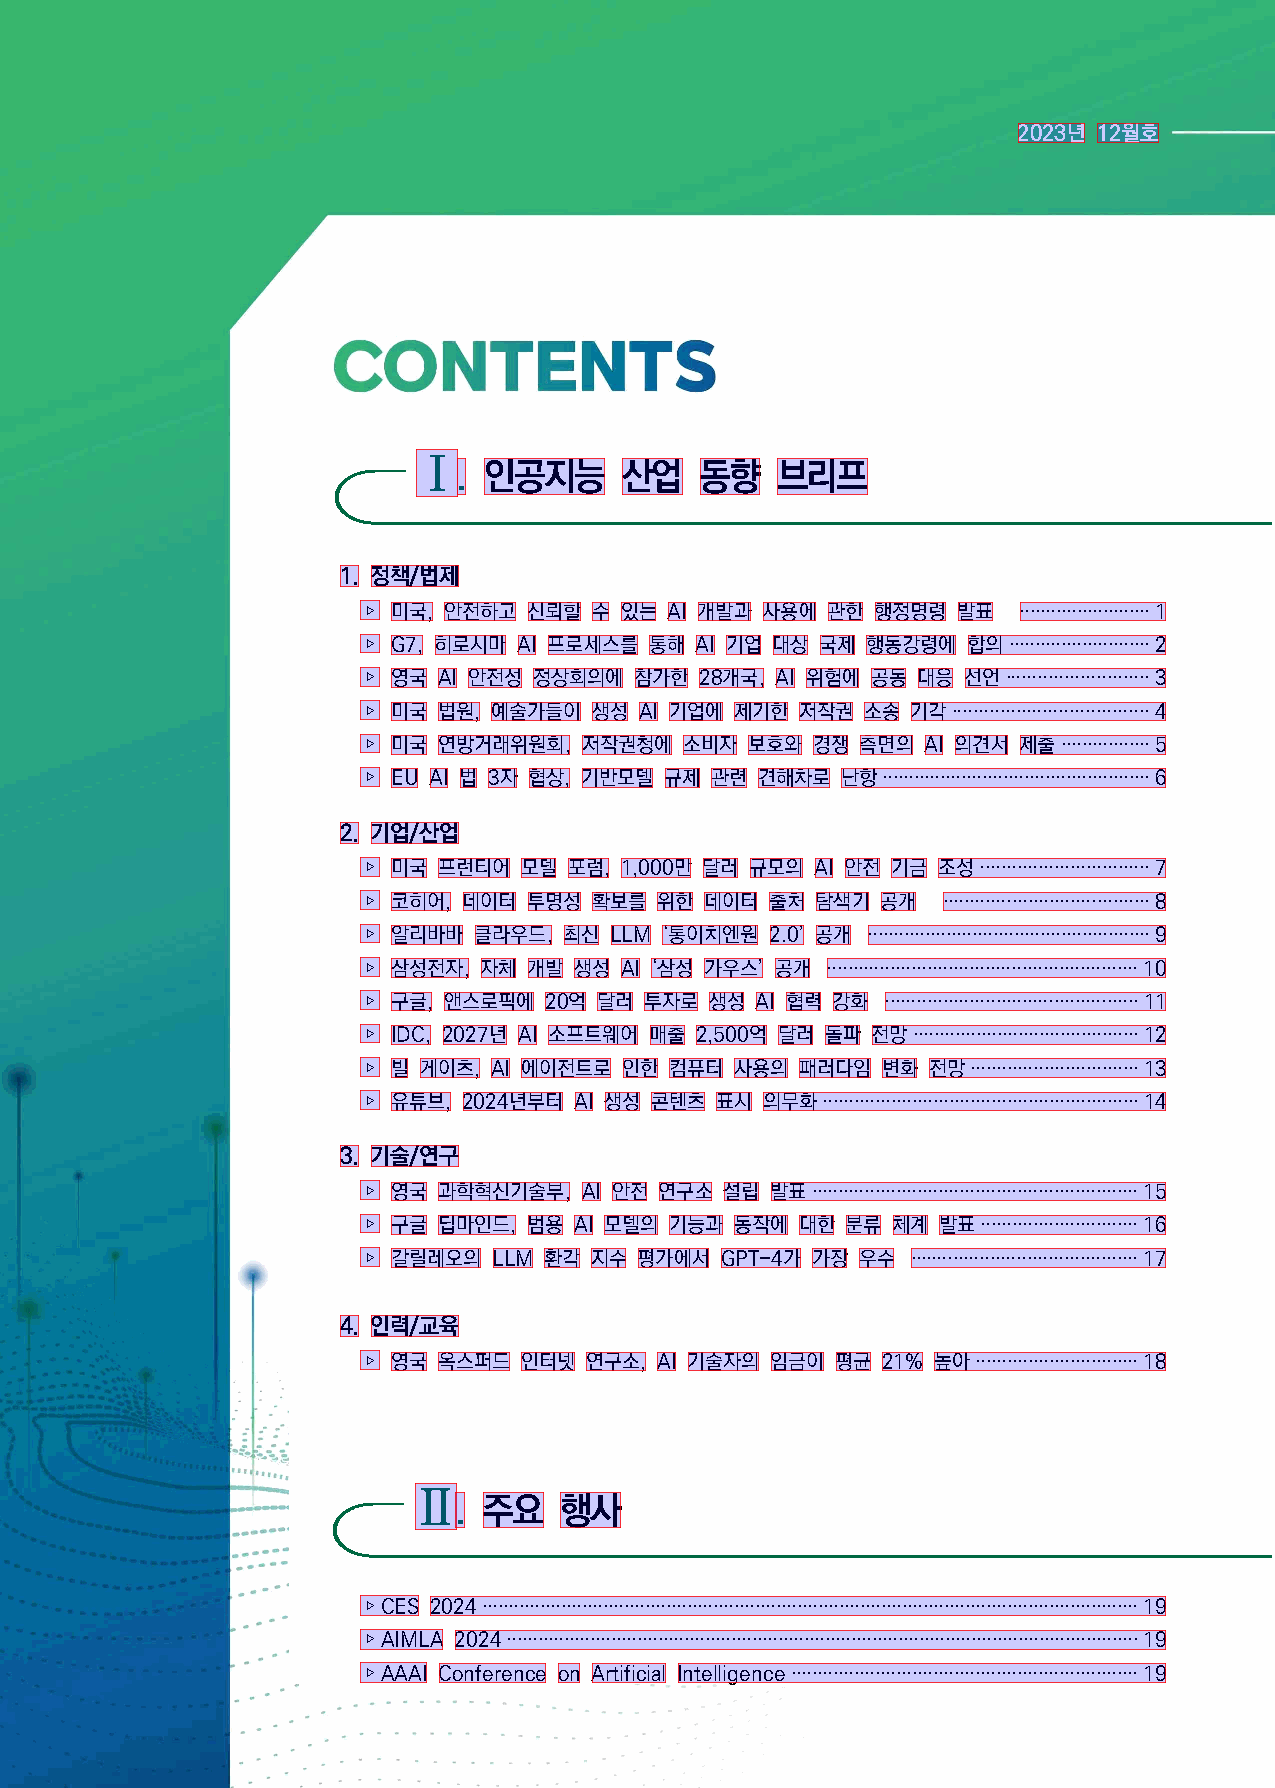

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    pages = pdf.pages
    im = pages[1].to_image(resolution=150)
    im.draw_rects(pages[1].extract_words())

im

- Extract Data

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if page.extract_table():
            print(f"page number: {page.page_number}")
            print(table)
            break

page number: 2
[['', 'Ⅰ\n. 인공지능 산업 동향 브리프\n1. 정책/법제\n▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 ·························1\n▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의···························2\n▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언···························3\n▹ 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각·····································4\n▹ 미국 연방거래위원회, 저작권청에 소비자 보호와 경쟁 측면의 AI 의견서 제출·················5\n▹ EU AI 법 3자 협상, 기반모델 규제 관련 견해차로 난항···················································6\n2. 기업/산업\n▹ 미국 프런티어 모델 포럼, 1,000만 달러 규모의 AI 안전 기금 조성································7\n▹ 코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개 ·······································8\n▹ 알리바바 클라우드, 최신 LLM ‘통이치엔원 2.0’ 공개 ······················································9\n▹ 삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개 ···························································10\n▹ 구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 ················································11\n▹ IDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망·····················

## PyMuPDF

### [PyMuPDFLoader](https://python.langchain.com/docs/integrations/document_loaders/pymupdf/)

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_path)

In [ ]:
docs = loader.load()
len(docs)

23

In [ ]:
docs[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'page': 0,
 'total_pages': 23,
 'format': 'PDF 1.4',
 'title': '',
 'author': 'dj',
 'subject': '',
 'keywords': '',
 'creator': 'Hwp 2018 10.0.0.13462',
 'producer': 'Hancom PDF 1.3.0.542',
 'creationDate': "D:20231208132838+09'00'",
 'modDate': "D:20231208132838+09'00'",
 'trapped': ''}

In [ ]:
docs[0].page_content

'2023년 12월호\n'

### [pymupdf](https://products.documentprocessing.com/ko/parser/python/pymupdf/)

In [ ]:
import pymupdf

In [ ]:
doc = pymupdf.open(pdf_path)

In [ ]:
len(doc)

23

- metadata

In [ ]:
doc.metadata

{'format': 'PDF 1.4',
 'title': '',
 'author': 'dj',
 'subject': '',
 'keywords': '',
 'creator': 'Hwp 2018 10.0.0.13462',
 'producer': 'Hancom PDF 1.3.0.542',
 'creationDate': "D:20231208132838+09'00'",
 'modDate': "D:20231208132838+09'00'",
 'trapped': '',
 'encryption': None}

- text

In [ ]:
doc[0].get_text()

'2023년 12월호\n'

- table

In [ ]:
doc[1].find_tables().tables[0].to_pandas()

,Col0,"Ⅰ\n. 인공지능 산업 동향 브리프\n1. 정책/법제\n▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 ························· 1\n▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의··························· 2\n▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언··························· 3\n▹ 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각····································· 4\n▹ 미국 연방거래위원회, 저작권청에 소비자 보호와 경쟁 측면의 AI 의견서 제출················· 5\n▹ EU AI 법 3자 협상, 기반모델 규제 관련 견해차로 난항··················································· 6\n2. 기업/산업\n▹ 미국 프런티어 모델 포럼, 1,000만 달러 규모의 AI 안전 기금 조성································ 7\n▹ 코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개 ······································· 8\n▹ 알리바바 클라우드, 최신 LLM ‘통이치엔원 2.0’ 공개 ······················································ 9\n▹ 삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개 ··························································· 10\n▹ 구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 ················································ 11\n▹ IDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망··········································· 12\n▹ 빌 게이츠, AI 에이전트로 인한 컴퓨터 사용의 패러다임 변화 전망································ 13\n▹ 유튜브, 2024년부터 AI 생성 콘텐츠 표시 의무화···························································· 14\n3. 기술/연구\n▹ 영국 과학혁신기술부, AI 안전 연구소 설립 발표······························································ 15\n▹ 구글 딥마인드, 범용 AI 모델의 기능과 동작에 대한 분류 체계 발표······························ 16\n▹ 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수 ··········································· 17\n4. 인력/교육\n▹ 영국 옥스퍼드 인터넷 연구소, AI 기술자의 임금이 평균 21% 높아······························· 18"
0,,Ⅱ\n. 주요 행사\n▹CES 2024 ························...


- image

In [ ]:
image_list = doc[1].get_images(full=True)

In [ ]:
image_list

[(19, 0, 2551, 3579, 8, 'DeviceRGB', '', 'Im2', 'DCTDecode', 0),
 (20, 0, 3754, 328, 1, '', '', 'Im3', 'FlateDecode', 0),
 (21, 20, 3754, 328, 8, 'DeviceRGB', '', 'Im4', 'FlateDecode', 0),
 (30, 0, 3761, 328, 1, '', '', 'Im5', 'FlateDecode', 0),
 (31, 30, 3761, 328, 8, 'DeviceRGB', '', 'Im6', 'FlateDecode', 0)]

- image

In [ ]:
for image_index, img in enumerate(image_list, start=1):
    xref = img[0]
    base_image = doc.extract_image(xref)
    image_bytes = base_image["image"]
    image_ext = base_image["ext"]

    # Save the image to a file
    image_filename = f"page_{1}_image_{image_index}.{image_ext}"
    with open(image_filename, "wb") as img_file:
        img_file.write(image_bytes)

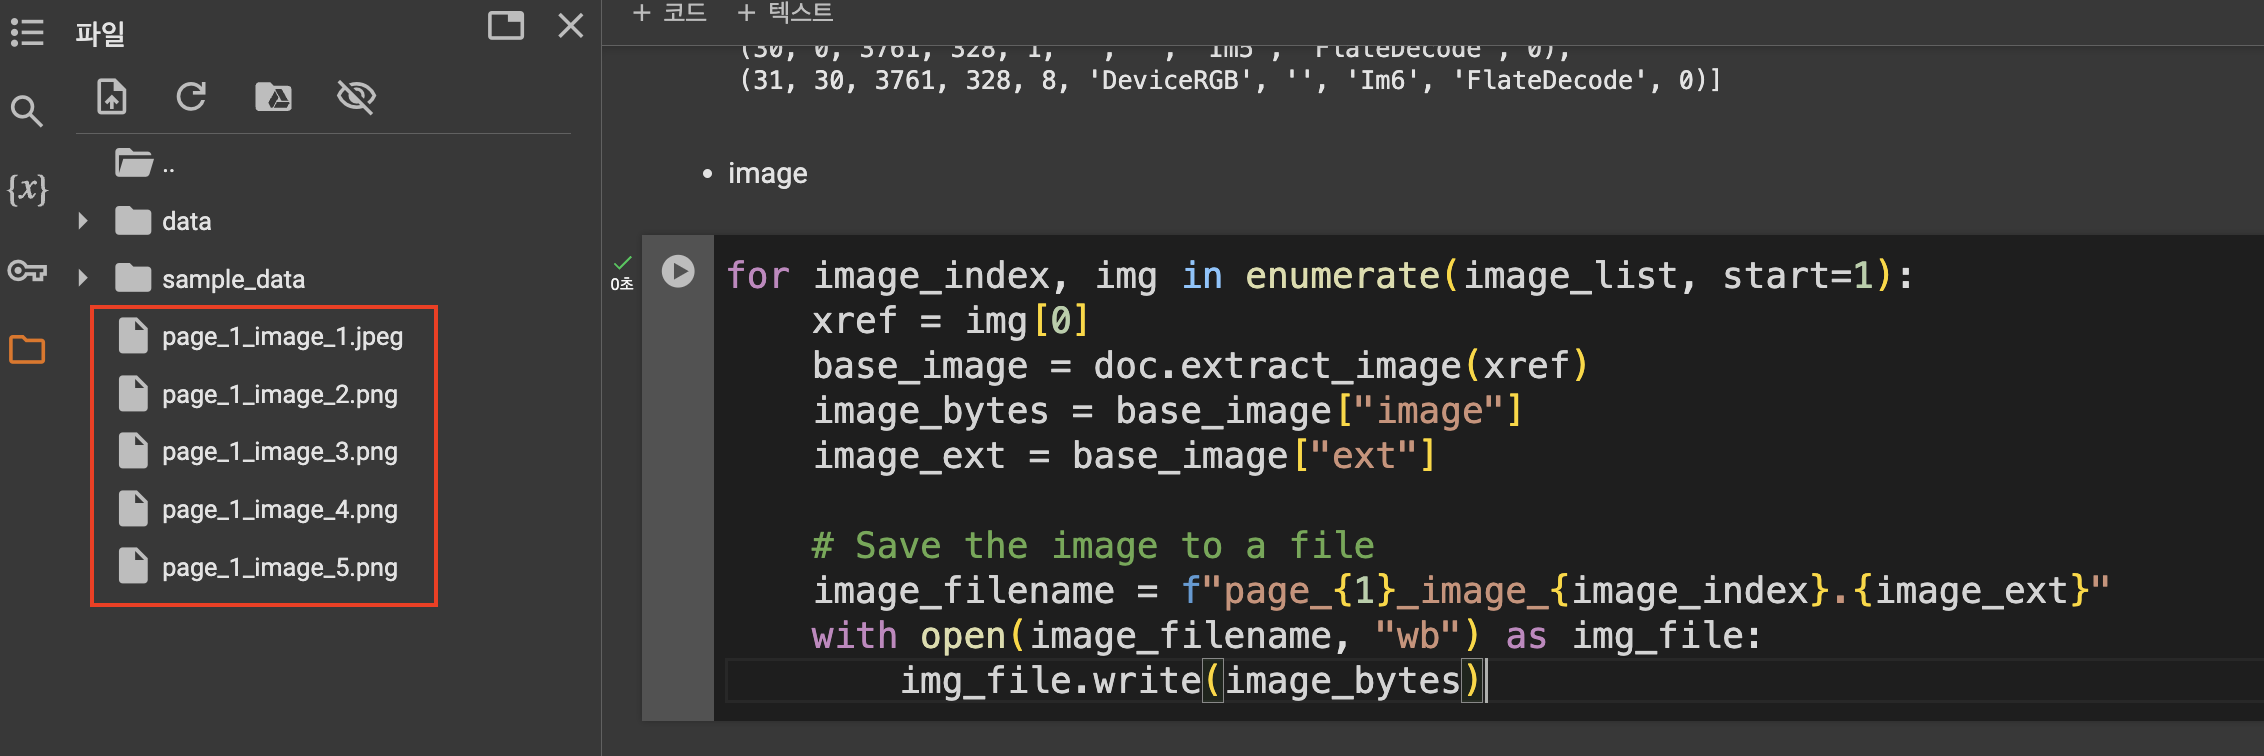

In [ ]:
doc.close()

# [다중 문서 로드](https://python.langchain.com/docs/how_to/document_loader_directory/)

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

## Text

In [ ]:
import os
from glob import glob

files = glob(os.path.join(DATA_PATH, '*.txt'))
files

['/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt',
 '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt',
 '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/appendix-keywords.txt',
 '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/chain-of-density.txt',
 '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/reference.txt']

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = DirectoryLoader(path=DATA_PATH, glob='*.txt'
                    , show_progress=True, loader_cls=TextLoader)


In [ ]:
docs = loader.load()
len(docs)

100%|██████████| 5/5 [00:00<00:00, 205.26it/s]


5

In [ ]:
for doc in docs:
    print(doc.metadata)

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt'}
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/appendix-keywords.txt'}
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/chain-of-density.txt'}
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/reference.txt'}


In [ ]:
docs[0].page_content

'제목: \nAI2, 상업 활용까지 자유로운 \'진짜\' 오픈 소스 LLM \'올모\' 출시\n\n내용:\n앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) \'올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.\n벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. \n이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. \n올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 사전 훈련을 위한 3조개의 토큰 공개 코퍼스를 특징으로 하는 AI2의 ‘돌마(Dolma)’ 데이터 세트를 기반으로 구축됐다.\n프레임워크에는 추론 코드, 훈련 지표 및 훈련 로그와 함께 최소 2조개의 토큰으로 훈련된 모델에 대한 전체 모델 가중치가 포함된다. 또 개발에 사용된 평가 제품군도 포함돼 있으며, 평가 제품군은 훈련 과정 중 1000단계마다 모델당 500개 이상의 체크포인트로 구성된다.\n또 아파치 2.0 라이선스에 따라 상업적 활용에 제한이 없다. \n이와 관련, 카네기 멜론대학교는 지난달 "빅테크의 오픈 소스 AI는 사실상 상업용 모델"이라며 "빅테크의 마케팅이나 규제회피 용도로 오픈 소스라는 단어를 활용한다"라고 비난한 바 있다. 실제 메타나 마이크로소프트, 애플 등이 공개한 오픈 소스는 연구에 한정되거나 상업 활용 시 사용자 수에 따라 별도 라이선스를 획득해야 한다.\n한나 하지시르지 AI2 올모 프로젝트 책임자는 "오늘날 많은 언어 모델은 제

## Python

In [ ]:
import os
from glob import glob

files = glob(os.path.join(DATA_PATH, '*.py'))
files

['/content/data/MyDrive/ai_lecture/3. Large Language Models/data/audio_utils.py']

In [ ]:
from langchain_community.document_loaders import PythonLoader

loader = DirectoryLoader(path=DATA_PATH, glob='*.py'
                    , show_progress=True, loader_cls=PythonLoader)


In [ ]:
docs = loader.load()
len(docs)

100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


1

In [ ]:
docs[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/audio_utils.py'}, page_content='import re\nimport os\nfrom pytube import YouTube\nfrom moviepy.editor import AudioFileClip, VideoFileClip\nfrom pydub import AudioSegment\nfrom pydub.silence import detect_nonsilent\n\n\ndef extract_abr(abr):\n    youtube_audio_pattern = re.compile(r"\\d+")\n    kbps = youtube_audio_pattern.search(abr)\n    if kbps:\n        kbps = kbps.group()\n        return int(kbps)\n    else:\n        return 0\n\n\ndef get_audio_filepath(filename):\n    # audio 폴더가 없으면 생성\n    if not os.path.isdir("audio"):\n        os.mkdir("audio")\n\n    # 현재 스크립트의 절대 경로 얻기\n    current_directory = os.path.abspath("")\n\n    # 파일 경로 생성\n    audio_file_path = os.path.join(current_directory, "audio", filename)\n\n    return audio_file_path\n\n\ndef convert_mp4_to_wav(mp4_file_path, wav_file_path):\n    # MP4 파일 로드\n    audio_clip = AudioFileClip(mp4_file_path)\n\n    # WAV 형식으로 오디오 추출 및 저장\

# [소셜 플랫폼 데이터 로드](https://python.langchain.com/docs/integrations/document_loaders/#social-platforms)

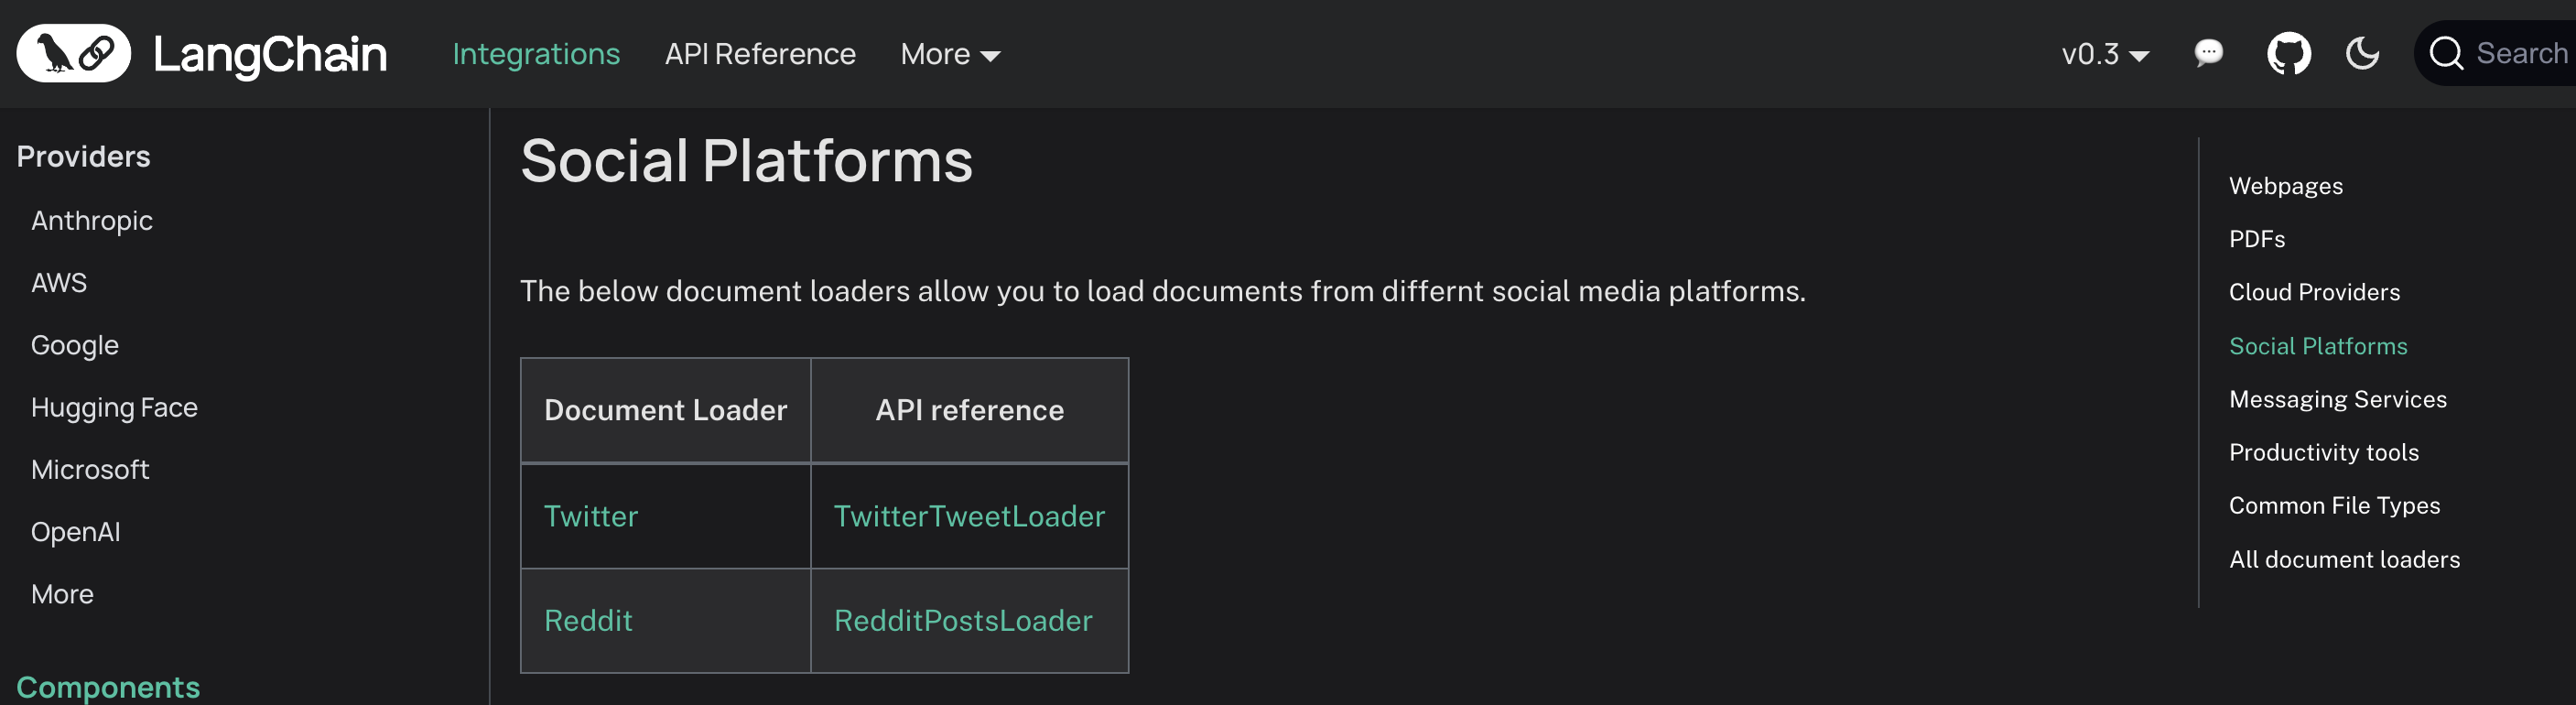

# [클라우드 데이터 로드](https://python.langchain.com/docs/integrations/document_loaders/#cloud-providers)

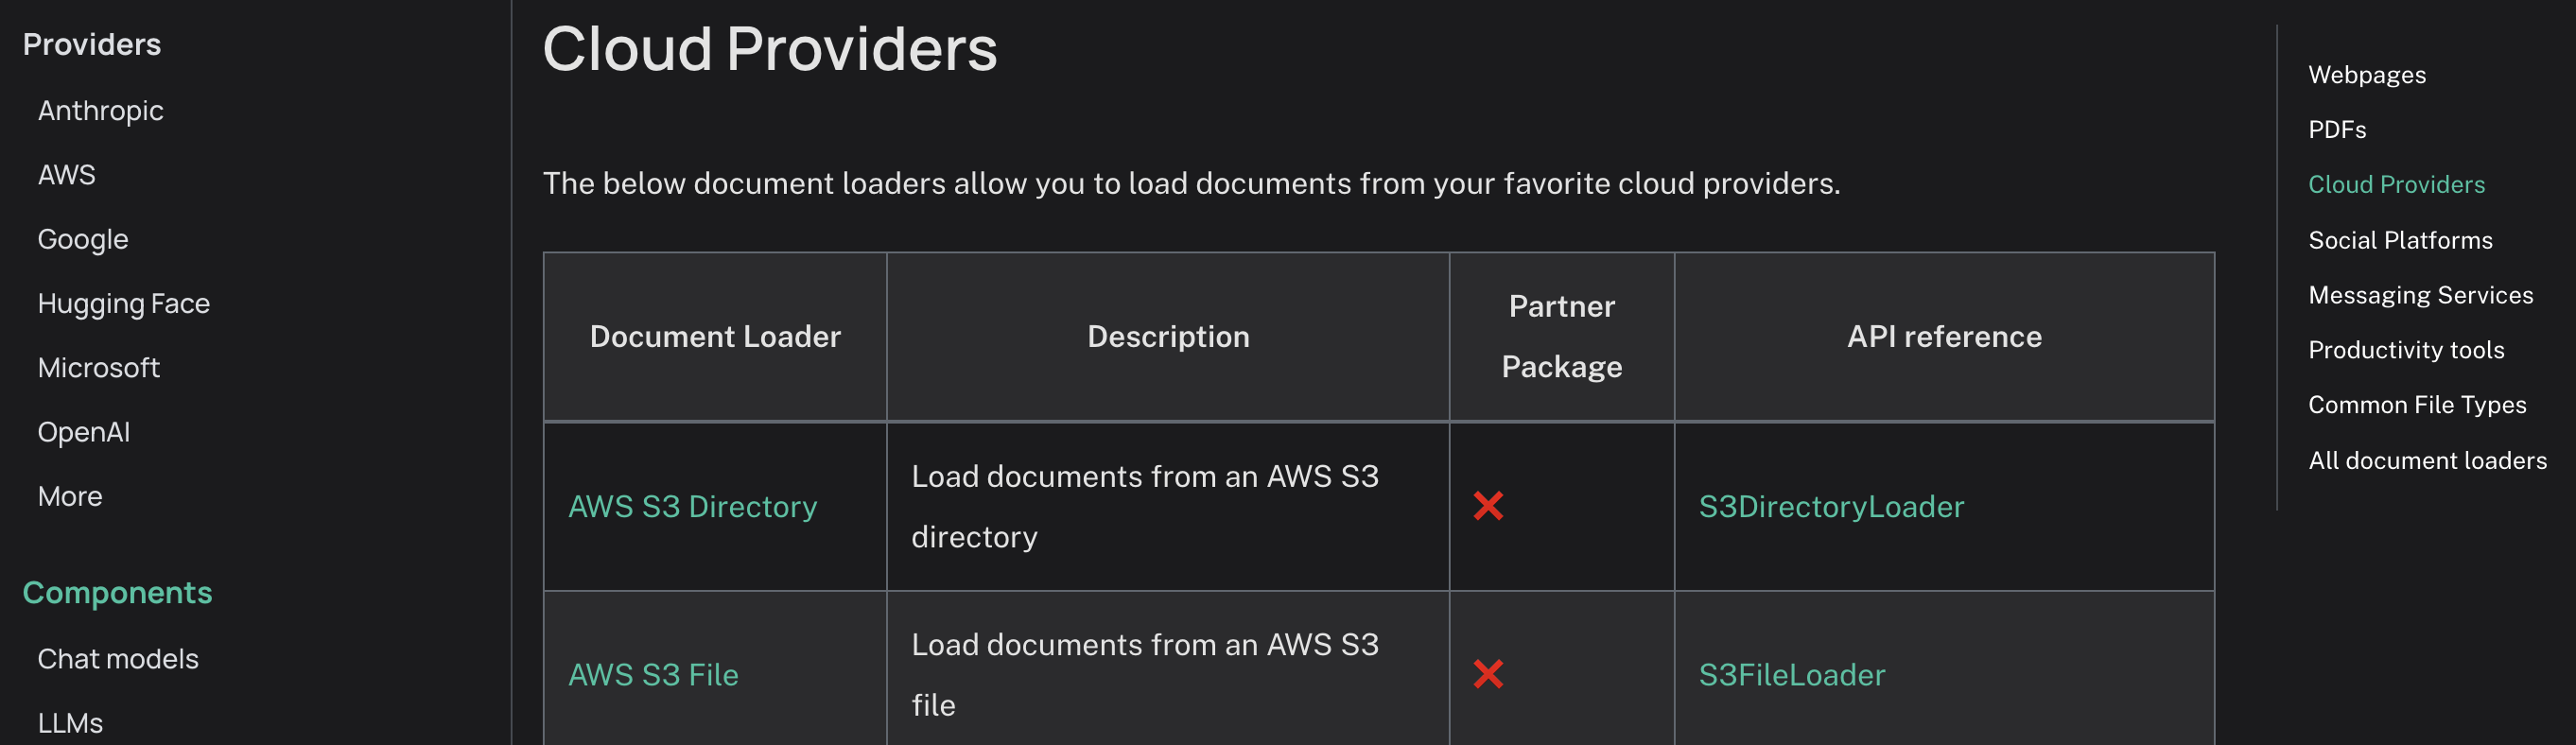